# Baseline Model- without crime data

In [ ]:
import os
path = "/content/drive/MyDrive/COMPSCI760"
os.chdir(path)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [ ]:
f = pd.read_csv('/content/drive/MyDrive/COMPSCI760/data_withoutcrime_27.csv')
f.columns

Index(['averge_room', 'Male', 'Female', 'Average Age', 'European', 'Māori',
       'Pacific Peoples', 'Asian', 'Middle Eastern / Latin American / African',
       'Other Ethnicity', 'New Zealander(19)', 'Other Ethnicity nec(19)',
       'Median personal income($)', 'Employed Full time', 'Employed Part time',
       'Unemployed', 'Paid employee', 'Employer',
       'Self employed and without employees', 'Unpaid family worker',
       'mean_CV', 'mean_FA', 'mean_AR', 'mean_bed', 'mean_Bath', 'mean_Price',
       'mean_school'],
      dtype='object')

In [ ]:
f = f.rename(columns={'mean_CV':'median_CV', 'mean_FA':'median_FA','mean_AR':'median_AR','mean_bed':'median_Bed','mean_Bath':'median_Bath','mean_Price':'median_Price','mean_school':'median_School'})
f.columns

Index(['averge_room', 'Male', 'Female', 'Average Age', 'European', 'Māori',
       'Pacific Peoples', 'Asian', 'Middle Eastern / Latin American / African',
       'Other Ethnicity', 'New Zealander(19)', 'Other Ethnicity nec(19)',
       'Median personal income($)', 'Employed Full time', 'Employed Part time',
       'Unemployed', 'Paid employee', 'Employer',
       'Self employed and without employees', 'Unpaid family worker',
       'median_CV', 'median_FA', 'median_AR', 'median_Bed', 'median_Bath',
       'median_Price', 'median_School'],
      dtype='object')

In [ ]:
xf = f.drop(['median_Price'], axis=1)
xf_nocv = f.drop(['median_CV', 'median_Price'], axis = 1)
yf = f['median_Price']
print(xf.shape, xf_nocv.shape, yf.shape)

(7938, 26) (7938, 25) (7938,)


In [ ]:
xf.head(2)

,averge_room,Male,Female,Average Age,European,Māori,Pacific Peoples,Asian,Middle Eastern / Latin American / African,Other Ethnicity,...,Paid employee,Employer,Self employed and without employees,Unpaid family worker,median_CV,median_FA,median_AR,median_Bed,median_Bath,median_School
0,2.684211,0.58000,0.42000,41.423077,0.703125,0.265625,0.000000,0.000000,0.0,0.015625,...,0.339286,0.035714,382,0.017857,217000.0,87.0,0.16005,2.0,1.0,0.0
1,2.161290,0.54717,0.45283,50.076923,0.746032,0.142857,0.047619,0.015873,0.0,0.015873,...,0.297872,0.042553,364,0.042553,225000.0,77.0,0.08790,2.0,1.0,0.0


In [ ]:
yf.head()

0    12.577041
1    12.396693
2    12.013701
3    12.236150
4    12.706848
Name: median_Price, dtype: float64

## f_Drop median_cv

### Original models

In [ ]:
## Decide modelling methods
models = [Ridge(alpha=1, normalize=True),
          DecisionTreeRegressor(),
          RandomForestRegressor()]
## Use 5-Fold cross validatin which wraped in the 'cross_val_score' function
rmse_f = dict()
for m in models:
    m_name = str(m).split('(')[0]
    scores = cross_val_score(m, X=xf_nocv, y=yf, cv = 5, scoring="neg_mean_squared_error")
    rmse_f[m_name] = np.sqrt(-scores)    ## Convert from MSE to RMSE
    print(m_name + ' is finished')

## Dispaly the model results in type of DataFrame
rmse_f = pd.DataFrame(rmse_f)   
rmse_f.index = ['cv' + str(x) for x in range(1, 6)]
rmse_f.loc['RMSE'] = rmse_f.apply(lambda x: x.mean())
print(rmse_f)

Ridge is finished
DecisionTreeRegressor is finished
RandomForestRegressor is finished
         Ridge  DecisionTreeRegressor  RandomForestRegressor
cv1   0.306604               0.397915               0.271742
cv2   0.279025               0.357651               0.255879
cv3   0.391600               0.442457               0.336262
cv4   0.257073               0.357963               0.252181
cv5   0.269746               0.380929               0.250418
RMSE  0.300810               0.387383               0.273296


### Tuning hyperparameters 

In [ ]:
## Tuning the Hyperparameters for Ridge Regressor
## Grid Search Method

from sklearn.model_selection import GridSearchCV
parameters_ridge = {'alpha': [0.001, 0.005, 0.01, 0.1, 0.5, 1, 3, 5, 7, 10, 20]}
model_ridge = Ridge(normalize = True)
gs_dt = GridSearchCV(model_ridge, parameters_ridge, cv=5, scoring='neg_mean_squared_error')
gs_dt.fit(xf_nocv, yf)

print("Best_params for Ridge model:{0}\nBest_RMSE for Ridge model:{1}".format(gs_dt.best_params_, np.sqrt(-gs_dt.best_score_)))

Best_params for Ridge model:{'alpha': 0.005}
Best_RMSE for Ridge model:0.2822841723652414


In [ ]:
## Tuning the Hyperparameters for Decision Tree Regressor
## Grid Search Method

from sklearn.model_selection import GridSearchCV
parameters_dt = {'max_depth': range(1,24), 'min_samples_split': range(10, 100, 10)}
model_dt = DecisionTreeRegressor()
gs_dt = GridSearchCV(model_dt, parameters_dt, cv=5, scoring='neg_mean_squared_error')
gs_dt.fit(xf_nocv, yf)

print("Best_params for DTR model:{0}\nBest_RMSE for DTR model:{1}".format(gs_dt.best_params_, np.sqrt(-gs_dt.best_score_)))

Best_params for DTR model:{'max_depth': 6, 'min_samples_split': 80}
Best_RMSE for DTR model:0.3049867604004201


In [ ]:
## Tuning the Hyperparameters for Random Forest Regressor
## Grid Search Method

from sklearn.model_selection import GridSearchCV
parameters_rf_test1 = {'n_estimators': range(50, 100, 10), 'max_depth': range(2,20), 'min_samples_split': range(10, 100, 10)}
model_rf = RandomForestRegressor()
gs_rf = GridSearchCV(model_rf, parameters_rf_test1, cv=5, scoring='neg_mean_squared_error', n_jobs=20)
gs_rf.fit(xf_nocv, yf)

print("Best_params for RFR model:{0}\nBest_RMSE for RFR model:{1}".format(gs_rf.best_params_, np.sqrt(-gs_rf.best_score_)))

Best_params for RFR model:{'max_depth': 16, 'min_samples_split': 10, 'n_estimators': 80}
Best_RMSE for RFR model:0.27498310839214146


In [ ]:
## Tuning the Hyperparameters for Multi-layer Perceptron Regressor
## Grid Search Method

parameters_mlp = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
model_mlp = MLPRegressor()
gs_mlp = GridSearchCV(model_mlp, parameters_mlp, cv=5, scoring='neg_mean_squared_error', n_jobs=20)
gs_mlp.fit(xf_nocv, yf)

print("Best_params for MLP model:{0}\nBest_RMSE for MLP model:{1}".format(gs_mlp.best_params_, np.sqrt(-gs_mlp.best_score_)))

Best_params for MLP model:{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 50, 'solver': 'adam'}
Best_RMSE for MLP model:0.44486105785790286


### Improved Models

In [ ]:
## Decide modelling methods
models2 = [Ridge(alpha = 0.005, normalize = True),
      DecisionTreeRegressor(max_depth = 6, min_samples_split = 80),
      RandomForestRegressor(n_estimators = 80, max_depth = 16, min_samples_split =10),
      ]

## Use 5-Fold cross validatin which wraped in the 'cross_val_score' function
rmse_f2 = dict()
for m in models2:
    m_name = str(m).split('(')[0]
    scores = cross_val_score(m, X=xf_nocv, y=yf, cv = 5, scoring="neg_mean_squared_error")
    rmse_f2[m_name] = np.sqrt(-scores)    ## Convert from MSE to RMSE
    print(m_name + ' is finished')
print("\n")
## Dispaly the model results in type of DataFrame
rmse_f2 = pd.DataFrame(rmse_f2)   
rmse_f2.index = ['cv' + str(x) for x in range(1, 6)]
rmse_f2.loc['RMSE'] = rmse_f2.apply(lambda x: x.mean())
print("The cross validation results in three models are as follows:\n{}".format(rmse_f2))

Ridge is finished
DecisionTreeRegressor is finished
RandomForestRegressor is finished


The cross validation results in three models are as follows:
         Ridge  DecisionTreeRegressor  RandomForestRegressor
cv1   0.303220               0.303937               0.273089
cv2   0.253645               0.294738               0.255268
cv3   0.327335               0.363934               0.337563
cv4   0.253652               0.273264               0.253247
cv5   0.265812               0.280562               0.251508
RMSE  0.280733               0.303287               0.274135


### Feature importance

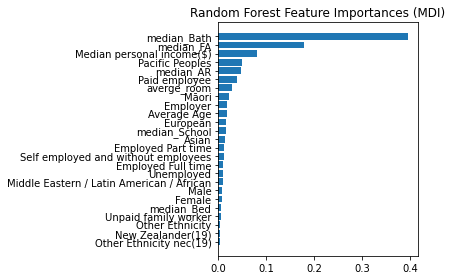

In [ ]:
rf = RandomForestRegressor(n_estimators = 80, max_depth = 16, min_samples_split =10)
rf.fit(xf_nocv, yf)
rf_imp = rf.feature_importances_
ind = np.argsort(rf_imp)

fig, ax = plt.subplots()
ax.barh(range(len(rf_imp)), rf_imp[ind])
ax.set_yticks(range(len(rf_imp)))
_ = ax.set_yticklabels(np.array(xf_nocv.columns)[ind])
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()

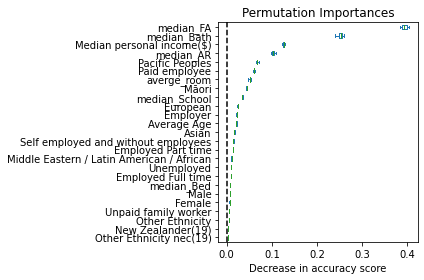

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf, xf_nocv, yf, n_repeats=10, random_state=760, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=xf_nocv.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [ ]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
             max_iter = 300,activation = 'relu',
             solver = 'adam')
## Decide modelling methods
models = [Ridge(alpha=1, normalize=True),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          MLPRegressor()]
## Use 5-Fold cross validatin which wraped in the 'cross_val_score' function
rmse_f = dict()
for m in models:
    m_name = str(m).split('(')[0]
    scores = cross_val_score(m, X=xf_nocv, y=yf, cv = 5, scoring="neg_mean_squared_error")
    rmse_f[m_name] = np.sqrt(-scores)    ## Convert from MSE to RMSE
    print(m_name + ' is finished')

## Dispaly the model results in type of DataFrame
rmse_f = pd.DataFrame(rmse_f)   
rmse_f.index = ['cv' + str(x) for x in range(1, 6)]
rmse_f.loc['RMSE'] = rmse_f.apply(lambda x: x.mean())
print(rmse_f)

Ridge is finished
DecisionTreeRegressor is finished
RandomForestRegressor is finished
MLPRegressor is finished
         Ridge  DecisionTreeRegressor  RandomForestRegressor  MLPRegressor
cv1   0.306604               0.399919               0.273570      1.555624
cv2   0.279025               0.364786               0.256542      1.426041
cv3   0.391600               0.439309               0.338222      1.324128
cv4   0.257073               0.362363               0.251714      1.642085
cv5   0.269746               0.381670               0.250439      1.935013
RMSE  0.300810               0.389609               0.274097      1.576578


# Baseline Model- with crime data

In [ ]:
fc = pd.read_csv('/content/drive/MyDrive/COMPSCI760/data_withcrime_31.csv')
fc.columns

Index(['averge_room', 'Male', 'Female', 'Average Age', 'European', 'Māori',
       'Pacific Peoples', 'Asian', 'Middle Eastern / Latin American / African',
       'Other Ethnicity', 'New Zealander(19)', 'Other Ethnicity nec(19)',
       'Median personal income($)', 'Employed Full time', 'Employed Part time',
       'Unemployed', 'Paid employee', 'Employer',
       'Self employed and without employees', 'Unpaid family worker',
       'median_CV', 'median_FA', 'median_AR', 'median_bed', 'median_Bath',
       'median_Price', 'median_school', 'weighted_weapon', 'weighted_crime',
       'Number_of_happens', 'Number of Victimisations'],
      dtype='object')

In [ ]:
fc = fc.rename(columns={'mean_CV':'median_CV', 'mean_FA':'median_FA','mean_AR':'median_AR','mean_bed':'median_Bed','mean_Bath':'median_Bath','mean_Price':'median_Price','mean_school':'median_School'})
fc.columns

Index(['averge_room', 'Male', 'Female', 'Average Age', 'European', 'Māori',
       'Pacific Peoples', 'Asian', 'Middle Eastern / Latin American / African',
       'Other Ethnicity', 'New Zealander(19)', 'Other Ethnicity nec(19)',
       'Median personal income($)', 'Employed Full time', 'Employed Part time',
       'Unemployed', 'Paid employee', 'Employer',
       'Self employed and without employees', 'Unpaid family worker',
       'median_CV', 'median_FA', 'median_AR', 'median_bed', 'median_Bath',
       'median_Price', 'median_school', 'weighted_weapon', 'weighted_crime',
       'Number_of_happens', 'Number of Victimisations'],
      dtype='object')

In [ ]:
xfc = fc.drop(['median_Price'], axis=1)
xfc_nocv = fc.drop(['median_CV', 'median_Price'], axis = 1)
yfc = fc['median_Price']
print(xfc.shape, xfc_nocv.shape, yfc.shape)

(7417, 30) (7417, 29) (7417,)


## fc_Drop median_cv

### Original models

In [ ]:
## Decide modelling methods
models_fc = [Ridge(alpha=1, normalize=True),
      DecisionTreeRegressor(),
      RandomForestRegressor(),
      ]

## Use 5-Fold cross validatin which wraped in the 'cross_val_score' function
rmse_fc = dict()
for m in models_fc:
    m_name = str(m).split('(')[0]
    scores = cross_val_score(m, X=xfc_nocv, y=yfc, cv = 5, scoring="neg_mean_squared_error")
    rmse_fc[m_name] = np.sqrt(-scores)    ## Convert from MSE to RMSE
    print(m_name + ' is finished')

## Dispaly the model results in type of DataFrame
rmse_fc = pd.DataFrame(rmse_fc)   
rmse_fc.index = ['cv' + str(x) for x in range(1, 6)]
rmse_fc.loc['RMSE'] = rmse_f.apply(lambda x: x.mean())
print(rmse_fc)

Ridge is finished
DecisionTreeRegressor is finished
RandomForestRegressor is finished
         Ridge  DecisionTreeRegressor  RandomForestRegressor
cv1   0.309867               0.412602               0.268631
cv2   0.269364               0.350785               0.250700
cv3   0.390927               0.432083               0.339346
cv4   0.255324               0.349877               0.251354
cv5   0.266075               0.365154               0.247385
RMSE  0.300810               0.387383               0.273296


### Tuning hyperparameters

In [ ]:
## Tuning the Hyperparameters for Ridge Regressor
## Grid Search Method

from sklearn.model_selection import GridSearchCV
parameters_ridge_c = {'alpha': [0.001, 0.005, 0.01, 0.1, 0.5, 1, 3, 5, 7, 10, 20]}
model_ridge_c = Ridge(normalize = True)
gs_dt_c = GridSearchCV(model_ridge_c, parameters_ridge_c, cv=5, scoring='neg_mean_squared_error')
gs_dt_c.fit(xfc_nocv, yfc)

print("Best_params for Ridge model:{0}\nBest_RMSE for Ridge model:{1}".format(gs_dt.best_params_, np.sqrt(-gs_dt.best_score_)))

Best_params for Ridge model:{'alpha': 0.005}
Best_RMSE for Ridge model:0.2822841723652414


In [ ]:
## Tuning the Hyperparameters for Decision Tree Regressor
## Grid Search Method

from sklearn.model_selection import GridSearchCV
parameters_dt_c = {'max_depth': range(5,10), 'min_samples_split': range(10, 100, 10)}
model_dt_c = DecisionTreeRegressor()
gs_dt_c = GridSearchCV(model_dt_c, parameters_dt_c, cv=5, scoring='neg_mean_squared_error')
gs_dt_c.fit(xfc_nocv, yfc)

print("Best_params for DTR model:{0}\nBest_RMSE for DTR model:{1}".format(gs_dt_c.best_params_, np.sqrt(-gs_dt_c.best_score_)))

Best_params for DTR model:{'max_depth': 5, 'min_samples_split': 20}
Best_RMSE for DTR model:0.310653134598138


In [ ]:
## Tuning the Hyperparameters for Random Forest Regressor
## Grid Search Method

from sklearn.model_selection import GridSearchCV
parameters_rf_test1_c = {'n_estimators': range(50, 100, 10), 'max_depth': range(2,20), 'min_samples_split': range(10, 100, 10)}
model_rf = RandomForestRegressor()
gs_rf_c = GridSearchCV(model_rf, parameters_rf_test1_c, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gs_rf_c.fit(xfc_nocv, yfc)

print("Best_params for RFR model:{0}\nBest_RMSE for RFR model:{1}".format(gs_rf_c.best_params_, np.sqrt(-gs_rf_c.best_score_)))

Best_params for RFR model:{'max_depth': 13, 'min_samples_split': 10, 'n_estimators': 60}
Best_RMSE for RFR model:0.2739433091402011


In [ ]:
## Tuning the Hyperparameters for Multi-layer Perceptron Regressor
## Grid Search Method

parameters_mlp_c = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
model_mlp_c = MLPRegressor()
gs_mlp_c = GridSearchCV(model_mlp_c, parameters_mlp_c, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gs_mlp_c.fit(xfc_nocv, yfc)

print("Best_params for MLP model:{0}\nBest_RMSE for MLP model:{1}".format(gs_mlp_c.best_params_, np.sqrt(-gs_mlp_c.best_score_)))

Best_params for MLP model:{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50, 30), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'adam'}
Best_RMSE for MLP model:0.478523466982902


### Improved models

In [ ]:
## Decide modelling methods
models2_c = [Ridge(alpha = 0.005, normalize = True),
       DecisionTreeRegressor(max_depth = 5, min_samples_split = 30),
       RandomForestRegressor(n_estimators = 60, max_depth = 13, min_samples_split =10),
       ]

## Use 5-Fold cross validatin which wraped in the 'cross_val_score' function
rmse_f2_c = dict()
for m in models2_c:
    m_name = str(m).split('(')[0]
    scores = cross_val_score(m, X=xfc_nocv, y=yfc, cv = 5, scoring="neg_mean_squared_error")
    rmse_f2_c[m_name] = np.sqrt(-scores)    ## Convert from MSE to RMSE
    print(m_name + ' is finished')
print("\n")
## Dispaly the model results in type of DataFrame
rmse_f2_c = pd.DataFrame(rmse_f2_c)   
rmse_f2_c.index = ['cv' + str(x) for x in range(1, 6)]
rmse_f2_c.loc['RMSE'] = rmse_f2_c.apply(lambda x: x.mean())
print("The cross validation results in three models are as follows:\n{}".format(rmse_f2_c))

Ridge is finished
DecisionTreeRegressor is finished
RandomForestRegressor is finished


The cross validation results in three models are as follows:
         Ridge  DecisionTreeRegressor  RandomForestRegressor
cv1   0.304805               0.311047               0.271721
cv2   0.246336               0.292014               0.253093
cv3   0.326782               0.384405               0.340693
cv4   0.253685               0.270697               0.252364
cv5   0.264615               0.281896               0.249565
RMSE  0.279245               0.308012               0.273487


### Feature Importance

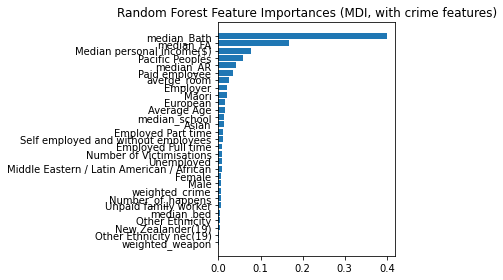

In [ ]:
rf_c = RandomForestRegressor(n_estimators = 80, max_depth = 16, min_samples_split =10)
rf_c.fit(xfc_nocv, yfc)
rf_imp_c = rf_c.feature_importances_
ind_c = np.argsort(rf_imp_c)

fig, ax = plt.subplots()

ax.barh(range(len(rf_imp_c)), rf_imp_c[ind_c])
ax.set_yticks(range(len(rf_imp_c)))
_ = ax.set_yticklabels(np.array(xfc_nocv.columns)[ind_c])
ax.set_title("Random Forest Feature Importances (MDI, with crime features)")
ax.figure.tight_layout()

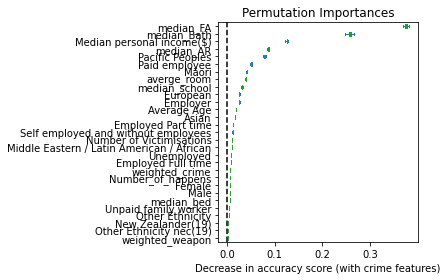

In [ ]:
from sklearn.inspection import permutation_importance

result_c = permutation_importance(
    rf_c, xfc_nocv, yfc, n_repeats=10, random_state=760, n_jobs=2
)

sorted_importances_idx_c = result_c.importances_mean.argsort()
importances_c = pd.DataFrame(
    result_c.importances[sorted_importances_idx_c].T,
    columns = xfc_nocv.columns[sorted_importances_idx_c],
)
ax = importances_c.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score (with crime features)")
ax.figure.tight_layout()